In [4]:
import re

original = "../../datasets/doggy_data/test_ft_output_1000"

with open(original, 'r') as file:
    lines = file.readlines()
    tags = []
    for line in lines:
        match = re.search(r'<([^>]+)>', line)
        if match:
            tags.append(match.group(1))

print(set(tags))



{'heavy', 'light_kappa'}


Average Alignment Score: 15.731


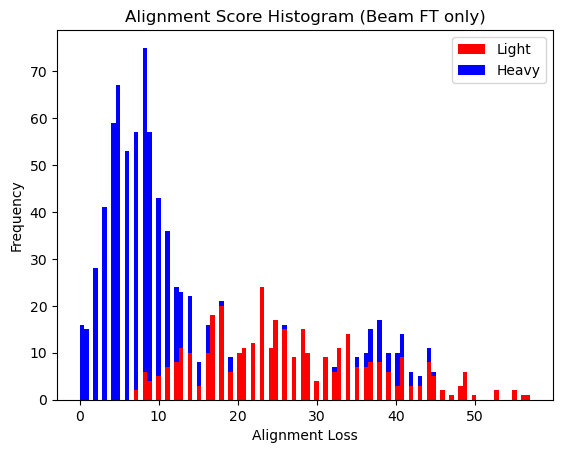

In [6]:
from Bio import Align
from Bio.Align import substitution_matrices
import pandas as pd

aligner = Align.PairwiseAligner()
aligner.mode = 'global'
# aligner.open_gap_score = -11
# aligner.extend_gap_score = -1
# aligner.substitution_matrix = substitution_matrices.load(name='PAM30')

aligner.open_gap_score = -1
aligner.extend_gap_score = -1

alignment_scores = []
alignment_targets = []
alignment_losses = []

import matplotlib.pyplot as plt

# with open('../../datasets/outputs/small_ft_full_beam/test/processed', 'r') as file:
#     pairs = file.read().split('\n\n')
#     for pair in pairs:
#         seqs = pair.split('\n')
#         if len(seqs) < 2:
#             continue
#         alignment = aligner.align(seqs[0].strip("target: "), seqs[1])
#         alignment_target = aligner.align(seqs[0].strip("target: "), seqs[0].strip("target: "))
#         alignment_scores.append(alignment.score)
#         alignment_targets.append(alignment_target.score)
#         alignment_losses.append(alignment_target.score - alignment.score)

# average_score = sum(alignment_losses) / len(alignment_scores)
# print("Average Alignment Score:", average_score)

# df = pd.DataFrame({'losses': alignment_losses, 'tags': tags})

# df_light_kappa = df[df['tags'] == 'light_kappa']
# df_heavy = df[df['tags'] == 'heavy']

# plt.hist(df_light_kappa['losses'], bins=100, color='red', label='Light Kappa')
# plt.hist(df_heavy['losses'], bins=100, color='blue', label='Heavy')
# plt.xlabel('Alignment Loss')
# plt.ylabel('Frequency')
# plt.title('Alignment Score Histogram (Beam Pretrained on OAS)')
# plt.legend()
# plt.show()

# alignment_scores = []
# alignment_targets = []
# alignment_losses = []
# with open('../../datasets/outputs/small_ft_beam/test/processed', 'r') as file:
#     pairs = file.read().split('\n\n')
#     for pair in pairs:
#         seqs = pair.split('\n')
#         if len(seqs) < 2:
#             continue
#         alignment = aligner.align(seqs[0].strip("target: "), seqs[1])
#         alignment_target = aligner.align(seqs[0].strip("target: "), seqs[0].strip("target: "))
#         alignment_scores.append(alignment.score)
#         alignment_targets.append(alignment_target.score)
#         alignment_losses.append(alignment_target.score - alignment.score)

# average_score = sum(alignment_losses) / len(alignment_scores)
# print("Average Alignment Score:", average_score)

# df = pd.DataFrame({'losses': alignment_losses, 'tags': tags})

# df_light_kappa = df[df['tags'] == 'light_kappa']
# df_heavy = df[df['tags'] == 'heavy']

# plt.hist(df_light_kappa['losses'], bins=100, color='red', label='Light Kappa')
# plt.hist(df_heavy['losses'], bins=100, color='blue', label='Heavy')
# plt.xlabel('Alignment Loss')
# plt.ylabel('Frequency')
# plt.title('Alignment Score Histogram (Beam Pretrained on canine)')
# plt.legend()
# plt.show()

alignment_scores = []
alignment_targets = []
alignment_losses = []
with open('../../datasets/outputs/small_ft_only_beam/test/processed', 'r') as file:
    lines = file.readlines()
    for i in range(0, len(lines), 3):
        alignment_target = aligner.align(lines[i].strip("target: ").strip(), lines[i].strip("target: ").strip())
        alignment_targets.append(alignment_target.score)
        if len(lines[i+1].strip()) == 0:
            alignment_scores.append(0)
            alignment_losses.append(alignment_target.score)
            continue
        alignment = aligner.align(lines[i].strip("target: ").strip(), lines[i+1].strip())
        alignment_scores.append(alignment.score)
        alignment_losses.append(alignment_target.score - alignment.score)

average_score = sum(alignment_losses) / len(alignment_scores)
print("Average Alignment Score:", average_score)

df = pd.DataFrame({'losses': alignment_losses, 'tags': tags})

df_light_kappa = df[df['tags'] == 'light_kappa']['losses']
df_light_lambda = df[df['tags'] == 'light_lambda']['losses']
df_heavy = df[df['tags'] == 'heavy']['losses']

colors = ['red', 'blue']
labels = ['Light', 'Heavy']

plt.hist([df_light_kappa, df_heavy], bins=100, color=colors, label=labels, histtype='barstacked')
plt.xlabel('Alignment Loss')
plt.ylabel('Frequency')
plt.title('Alignment Score Histogram (Beam FT only)')
plt.legend()
plt.show()

